In [1]:
#importing necessary libraries for preprocessing and visualizationsand performance metrices
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sba
import numpy as np
from matplotlib import gridspec as gs

# importing libraries to split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay,
    auc
)



In [5]:
#loading bank dataset
df= pd.read_csv('bank_data_train.csv')
data= df.sample(n=40000, random_state=42)



In [6]:
#getting the first 5 rows to get an overview.
data

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
244774,452708,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
219018,420351,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
312981,538077,1,0.009008,NaN,36.0,NaN,NaN,0.0,0.5,0.306885,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
282498,499947,0,0.000000,0.0,56.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
59643,221387,0,0.260814,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72524,237489,0,0.025346,NaN,77.0,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
51582,211333,0,0.000000,NaN,74.0,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44364,202260,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
6515,155060,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [7]:
# fetching dataset info - no. of rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 244774 to 29177
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 35.7+ MB


In [8]:
#CHECKING FOR NULL VALUES
data.isna().sum()

ID                              0
CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC           4362
PRC_ACCEPTS_A_EMAIL_LINK    22651
APP_REGISTR_RGN_CODE        33211
                            ...  
TURNOVER_DYNAMIC_CC_3M          0
LDEAL_ACT_DAYS_PCT_TR       29568
LDEAL_ACT_DAYS_PCT_TR4      29568
LDEAL_ACT_DAYS_PCT_CURR     29568
TARGET                          0
Length: 116, dtype: int64

In [9]:
#Renaming columns for clarity
data = data.rename(columns={'AGE':'Age','APP_CAR':'Ownership','APP_COMP_TYPE':'Company_type','APP_DRIVING_LICENSE':'Driving_license','APP_EDUCATION':'Education','APP_EMP_TYPE':'Employment_type','APP_KIND_OF_PROP_HABITATION':'Habitation_property','APP_MARITAL_STATUS':'Marital_status','APP_POSITION_TYPE':'Position_type','APP_REGISTR_RGN_CODE':'Region_code','APP_TRAVEL_PASS':'International_passport','AVG_PCT_DEBT_TO_DEAL_AMT':'Debt_to_deal_amt','AVG_PCT_MONTH_TO_PCLOSE':'Percent_credit_left','CLNT_JOB_POSITION':'Job_position','CLNT_SALARY_VALUE':'Salary','CLNT_SETUP_TENOR':'Customer_months'})

In [10]:
data = data.rename(columns={'CLNT_TRUST_RELATION':'Trust_relation','PACK':'Service_package','REST_AVG_CUR':'Current_acc_balance','REST_AVG_PAYM':'Salary_acc_balance'})

In [11]:
#defining Target and features
X= data.drop('TARGET', axis=1) #features (drop the target column)
y= data['TARGET'] #target variable

In [12]:
X

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,Region_code,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
244774,452708,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
219018,420351,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
312981,538077,1,0.009008,NaN,36.0,NaN,NaN,0.0,0.5,0.306885,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
282498,499947,0,0.000000,0.0,56.0,0.0,0.0,0.0,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59643,221387,0,0.260814,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72524,237489,0,0.025346,NaN,77.0,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
51582,211333,0,0.000000,NaN,74.0,NaN,NaN,0.0,NaN,NaN,...,0.016561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44364,202260,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6515,155060,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Handling Null Values using Simple Imputer
from sklearn.impute import SimpleImputer

# Imputing numerical columns
n_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[n_columns] = imputer.fit_transform(X_train[n_columns])
X_test[n_columns] = imputer.transform(X_test[n_columns])

In [15]:
# Imputing categorical columns
c_columns = X_train.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
X_train[c_columns] = imputer.fit_transform(X_train[c_columns])
X_test[c_columns] = imputer.transform(X_test[c_columns])


In [16]:
#CHECKING FOR NULL VALUES
X_test.isna().sum()

ID                          0
CR_PROD_CNT_IL              0
AMOUNT_RUB_CLO_PRC          0
PRC_ACCEPTS_A_EMAIL_LINK    0
Region_code                 0
                           ..
LDEAL_DELINQ_PER_MAXYWZ     0
TURNOVER_DYNAMIC_CC_3M      0
LDEAL_ACT_DAYS_PCT_TR       0
LDEAL_ACT_DAYS_PCT_TR4      0
LDEAL_ACT_DAYS_PCT_CURR     0
Length: 115, dtype: int64

In [17]:
# Age to years conversion
if 'AGE' in X_train.columns:
    X_train['AGE'] = X_train['AGE'] / 12
    X_test['AGE'] = X_test['AGE'] / 12


In [18]:
#drop the above columns with 0.0 values
data.drop(['CNT_ACCEPTS_TK','CNT_ACCEPTS_MTP','PRC_ACCEPTS_A_EMAIL_LINK','PRC_ACCEPTS_A_POS','PRC_ACCEPTS_A_TK','PRC_ACCEPTS_A_AMOBILE','PRC_ACCEPTS_TK','PRC_ACCEPTS_A_MTP','PRC_ACCEPTS_A_ATM','PRC_ACCEPTS_MTP'],axis=1,inplace=True)

In [19]:
# Combine X_train and y_train to make a complete training DataFrame
data_train = pd.concat([X_train, y_train], axis=1)

In [20]:
# Label encoding for categorical features
categorical_columns = X_train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    # Ensure all categories in test set were seen during training
    X_test[col] = X_test[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

In [21]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<Axes: >

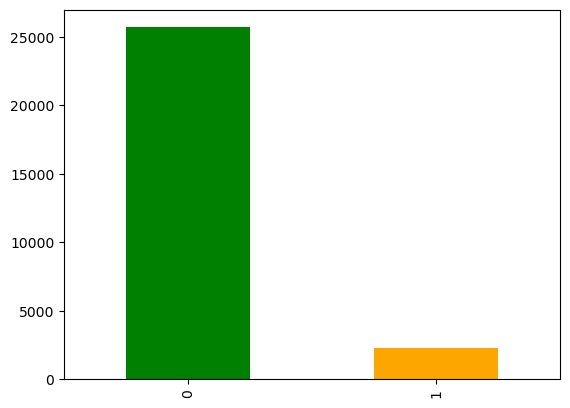

In [22]:
y_train.value_counts().plot(kind='bar', color=['green', 'orange'])

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
# Resampling (only on the training set)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<Axes: >

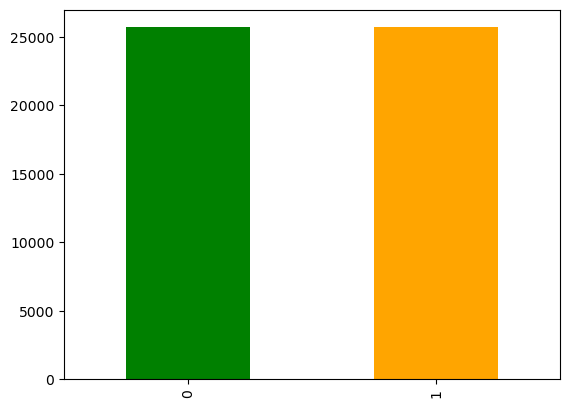

In [25]:
y_train_resampled.value_counts().plot(kind='bar', color=['green', 'orange'])

In [26]:
model = RandomForestClassifier(max_depth=6, 
                               random_state=42)

In [27]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=6, random_state=42)

In [28]:
# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

                      Feature  Importance
22        Current_acc_balance    0.079466
107          MED_DEBT_PRC_YWZ    0.069459
113    LDEAL_ACT_DAYS_PCT_TR4    0.068789
114   LDEAL_ACT_DAYS_PCT_CURR    0.052264
112     LDEAL_ACT_DAYS_PCT_TR    0.044205
..                        ...         ...
34            PRC_ACCEPTS_MTP    0.000000
6            PRC_ACCEPTS_A_TK    0.000000
37            CNT_ACCEPTS_MTP    0.000000
5           PRC_ACCEPTS_A_POS    0.000000
3    PRC_ACCEPTS_A_EMAIL_LINK    0.000000

[115 rows x 2 columns]


In [29]:
X_train_selected.columns

Index(['Current_acc_balance', 'MED_DEBT_PRC_YWZ', 'LDEAL_ACT_DAYS_PCT_TR4',
       'LDEAL_ACT_DAYS_PCT_CURR', 'LDEAL_ACT_DAYS_PCT_TR',
       'LDEAL_ACT_DAYS_PCT_TR3', 'DEAL_GRACE_DAYS_ACC_AVG',
       'SUM_TRAN_ATM_TENDENCY1M', 'CNT_TRAN_ATM_TENDENCY1M',
       'LDEAL_DELINQ_PER_MAXYWZ', 'LDEAL_USED_AMT_AVG_YWZ', 'CR_PROD_CNT_TOVR',
       'LDEAL_ACT_DAYS_PCT_AAVG', 'DEAL_YWZ_IR_MIN',
       'DEAL_GRACE_DAYS_ACC_S1X1', 'CNT_TRAN_ATM_TENDENCY3M',
       'SUM_TRAN_CLO_TENDENCY3M', 'TRANS_COUNT_ATM_PRC',
       'DEAL_GRACE_DAYS_ACC_MAX', 'AMOUNT_RUB_ATM_PRC'],
      dtype='object')

In [30]:
# Train the Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=50, random_state=22,max_leaf_nodes=9,max_depth=3)
rf_selected.fit(X_train_selected, y_train_resampled)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

Accuracy after feature selection: 0.81


In [31]:
accuracy_after = rf_selected.score(X_train_selected,y_train_resampled)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

Accuracy after feature selection: 0.76


In [32]:
y_train_pred = rf_selected.predict(X_train_selected)
y_test_pred = rf_selected.predict(X_test_selected)

In [33]:
# Calculate performance metrics for training data
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)


In [34]:
# Print the training and testing performance metrics
print("Training Accuracy: {:.2f}".format(train_acc))
print("Training Precision: {:.2f}".format(train_prec))
print("Training Recall: {:.2f}".format(train_rec))
print("Training F1-Score: {:.2f}".format(train_f1))


Training Accuracy: 0.76
Training Precision: 0.82
Training Recall: 0.66
Training F1-Score: 0.73


In [35]:
# Calculate performance metrics for testing data
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [36]:
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Precision: {:.2f}".format(test_prec))
print("Testing Recall: {:.2f}".format(test_rec))
print("Testing F1-Score: {:.2f}".format(test_f1))



Testing Accuracy: 0.81
Testing Precision: 0.17
Testing Recall: 0.35
Testing F1-Score: 0.23


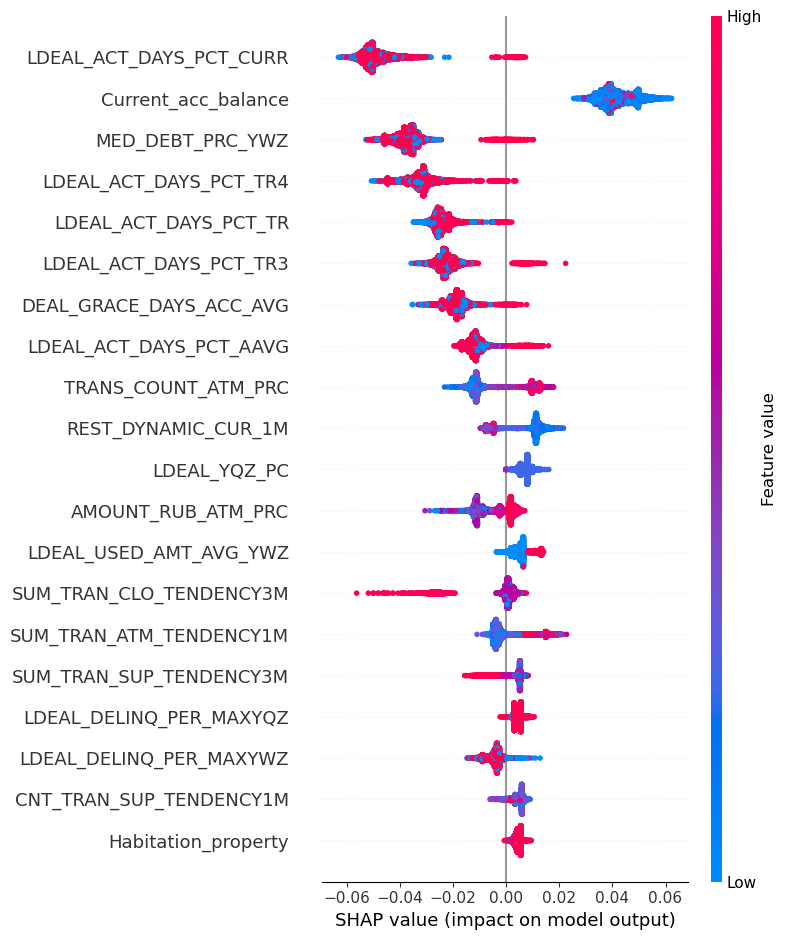

In [37]:
import shap
# Initialize SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(scaled_X_test)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# Summary plot
shap.summary_plot(shap_values[1], X_test)

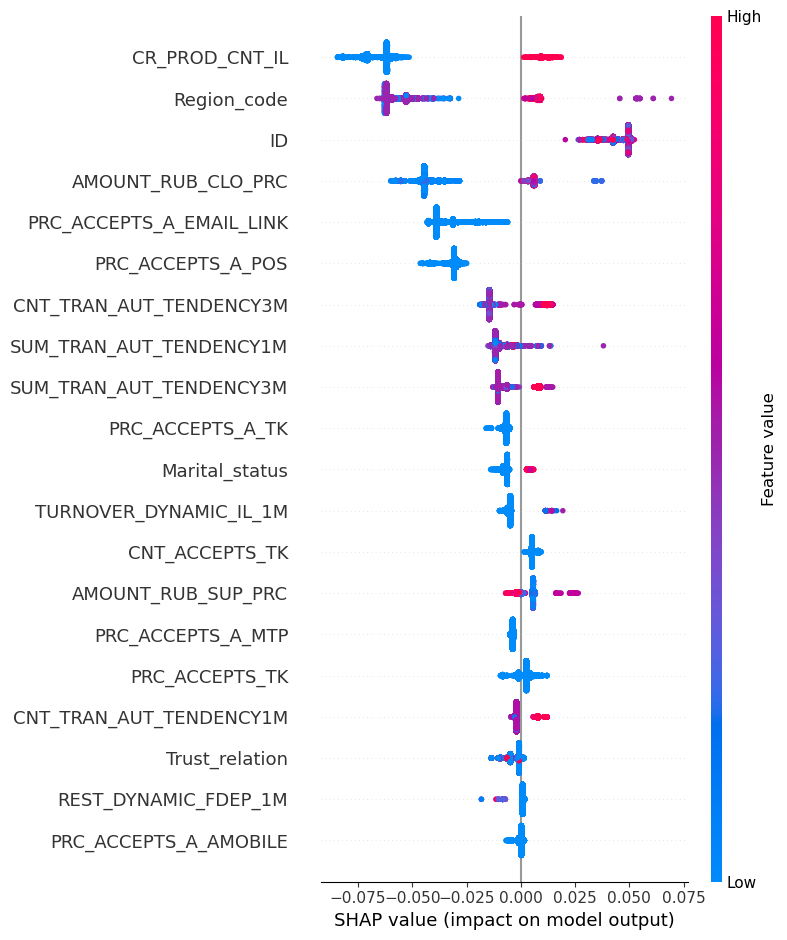

In [38]:
import shap
# Initialize SHAP
explainer = shap.TreeExplainer(rf_selected)
shap_values = explainer.shap_values(scaled_X_test)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# Summary plot
shap.summary_plot(shap_values[1], X_test)